# Machine Learning

## 1. Import library

In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import requests
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import random
from numpy import NaN as nan
import csv
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier

## 2. Read data file

In [3]:
df = pd.read_excel('C:/Users/1/Documents/Project/New_data/new_df_director.xlsx', index = False)

## 3. Separate sample on test and training sets

In [4]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [5]:
train_set,test_set = split_train_test(df,0.2)

In [6]:
train_set.to_excel('C:/Users/1/Documents/Project/Sets/train_set.xlsx', index = False)

In [7]:
test_set.to_excel('C:/Users/1/Documents/Project/Sets/test_set.xlsx', index = False)

## 4. Research data

## 4.1. Make copy of train set

In [8]:
copy_train_set = pd.read_excel('C:/Users/1/Documents/Project/Sets/train_set.xlsx', index = False)

In [9]:
# copy_train_set = train_set.copy()

# Рассчет корреляции

In [11]:
corr_matrix = copy_train_set.corr()

In [20]:
corr_matrix['Cum_world_gross'].sort_values(ascending = False)

Cum_world_gross        1.000000
Gross                  0.926801
Opening_week_usa       0.868888
Number_of_who_rated    0.647118
Number_of_rewiews      0.621172
Number_of_critics      0.577796
Ex_year_writer         0.240979
Ex_year_director       0.239873
Run_time               0.216022
Len_genres             0.209427
Imdb_rating            0.194934
Metascore              0.187410
Len_production_co      0.124369
Oscar_wr               0.072071
Year                   0.037423
Len_country            0.036951
Budget_2              -0.002858
Budget                -0.002858
Age_rating            -0.318557
Name: Cum_world_gross, dtype: float64

In [9]:
copy_train_set

,Unique_link,Name,Genres,Len_genres,Key_word,Director,Writer,Date_release,Country,Len_country,...,Age_rating,Metascore,Number_of_rewiews,Number_of_critics,Imdb_rating,Number_of_who_rated,Year,Oscar_wr,Ex_year_writer,Ex_year_director
0,/title/tt0102798/?ref_=kw_li_i,Robin Hood: Prince of Thieves (original title),"[u' Action', u' Adventure', u' Drama', u' Roma...",4,robin hood character,Kevin Reynolds,Pen Densham,14 June 1991 (USA)\n,"[u'USA', u'UK']",2,...,16,51.0,354,84,6.9,171976,1991,0,0,0
1,/title/tt1588875/?ref_=kw_li_i,Kak ya provyol etim letom (original title),[u' Drama'],1,arctic ocean,Aleksey Popogrebskiy,Aleksey Popogrebskiy,1 April 2010 (Russia)\n,[u'Russia'],1,...,16,74.0,22,85,7.0,6288,2010,0,0,0
2,/title/tt1157547/?ref_=kw_li_i,La Bohème,"[u' Music', u' Romance']",2,opera,Robert Dornhelm,Giuseppe Giacosa,17 October 2008 (Austria)\n,"[u'Austria', u'Germany']",2,...,16,51.4,10,20,7.2,351,2008,0,0,0
3,/title/tt1929263/?ref_=kw_li_i,Heaven Is for Real (original title),"[u' Biography', u' Drama', u' Family']",3,spider man action figure,Randall Wallace,Randall Wallace,16 April 2014 (USA)\n,[u'USA'],1,...,13,47.0,177,88,5.8,24921,2014,0,19,16
4,/title/tt1438173/?ref_=kw_li_i,Bait (original title),"[u' Action', u' Adventure', u' Drama', u' Horr...",5,shark,Kimble Rendall,Russell Mulcahy,27 September 2012 (Russia)\n,"[u'Australia', u'Singapore', u'China']",3,...,18,47.0,110,155,5.2,15535,2012,0,0,0
5,/title/tt1186371/?ref_=kw_li_i,Fung wan II (original title),"[u' Action', u' Adventure', u' Fantasy']",3,sequel,Danny Pang,Wing-Shing Ma,17 December 2009 (Hong Kong)\n,[u'Hong Kong'],1,...,13,47.0,21,30,5.3,1608,2009,0,0,5
6,/title/tt0808486/?ref_=kw_li_i,Suden vuosi,"[u' Drama', u' Romance']",2,looking at oneself in a mirror,Olli Saarela,Mika Ripatti,2 February 2007 (Finland)\n,[u'Finland'],1,...,15,47.0,3,0,6.1,728,2007,0,0,6
7,/title/tt0238924/?ref_=kw_li_i,The Dangerous Lives of Altar Boys (original ti...,"[u' Comedy', u' Drama']",2,glowing eye,Peter Care,Chris Fuhrman,15 August 2002 (Russia)\n,[u'USA'],1,...,18,69.0,120,80,7.0,12920,2002,0,0,0
8,/title/tt10890570/?ref_=kw_li_i,"Everton, Howard's Way","[u' Documentary', u' Sport']",2,Documentary |,Rob Sloman,Andy Gray,11 November 2019 (UK)\n,[u'UK'],1,...,16,62.0,1,0,8.9,54,2019,0,0,0
9,/title/tt1954315/?ref_=kw_li_i,Borgman (original title),"[u' Drama', u' Horror', u' Mystery', u' Thrill...",4,female nudity,Alex van Warmerdam,Alex van Warmerdam,29 August 2013 (Netherlands)\n,"[u'Netherlands', u'Belgium', u'Denmark']",3,...,18,66.0,69,183,6.7,15296,2013,0,0,10


## 4.1. Scatter matrix

In [18]:
attributes = (
    [
        "Len_genres",
        "Len_country",
        "Budget", 
        "Len_production_co", 
        "Run_time",
        "Age_rating",
        "Key_word",
        "Oscar_wr",
        "Ex_year_writer",
        "Ex_year_director"
    ]
)

In [21]:
attributes_2 = ["Len_genres", "Cum_world_gross"]

In [49]:
condition = (
    [
        (copy_train_set['Number_of_who_rated'] > 1000)
        & (copy_train_set['Imdb_rating'] > 7.5)
    ]
)

In [50]:
choice = [1]

In [51]:
copy_train_set['Y'] = np.select(condition, choice)

In [40]:
copy_train_set['Profit'] = copy_train_set['Cum_world_gross'] - copy_train_set['Budget']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018A7A1D0>,
      dtype=object)

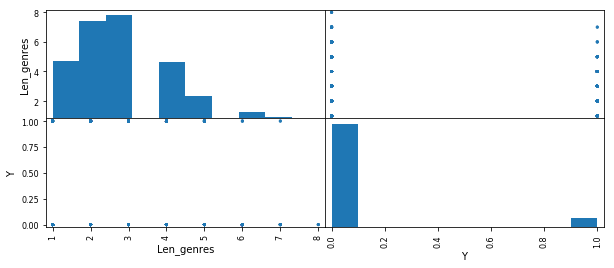

In [52]:
scatter_matrix(copy_train_set[["Len_genres", "Y"]], figsize = (10,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000192040F0>,
      dtype=object)

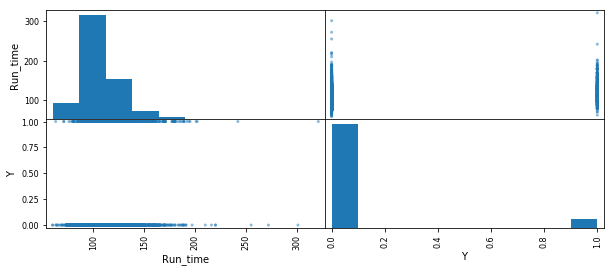

In [53]:
scatter_matrix(copy_train_set[["Run_time", "Y"]], figsize = (10,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011AAA908>,
      dtype=object)

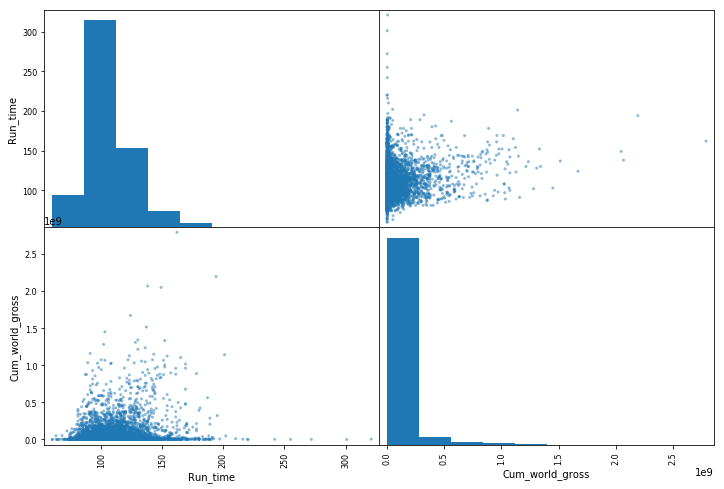

In [23]:
scatter_matrix(copy_train_set[["Run_time", "Cum_world_gross"]], figsize = (12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019C8C358>,
      dtype=object)

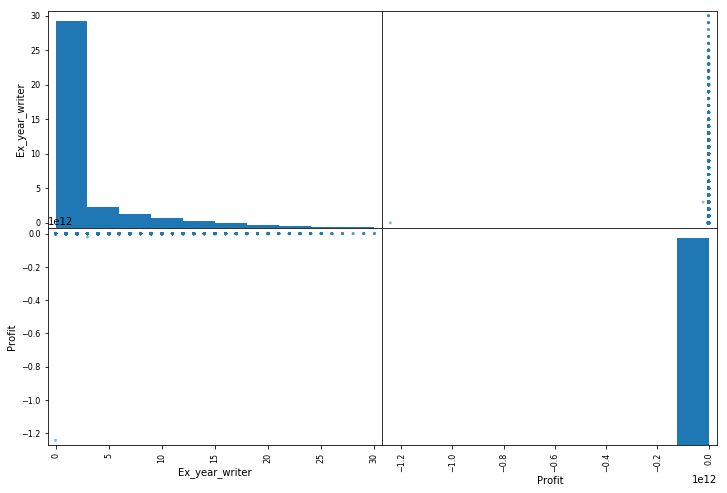

In [55]:
scatter_matrix(copy_train_set[["Ex_year_writer", "Profit"]], figsize = (12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000135159E8>,
      dtype=object)

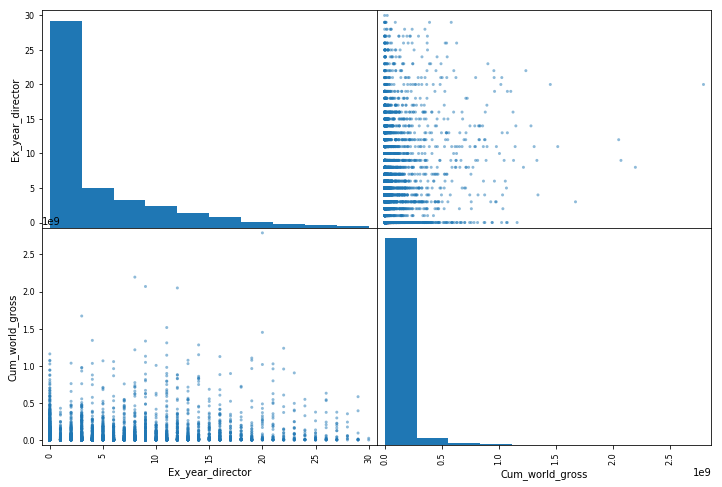

In [27]:
scatter_matrix(copy_train_set[["Ex_year_director", "Cum_world_gross"]], figsize = (12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001423A1D0>,
      dtype=object)

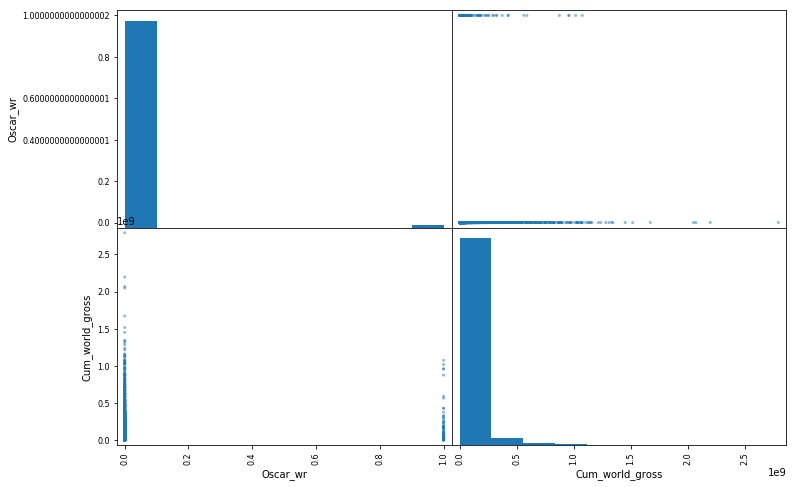

In [28]:
scatter_matrix(copy_train_set[["Oscar_wr", "Cum_world_gross"]], figsize = (12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015D5FA90>,
      dtype=object)

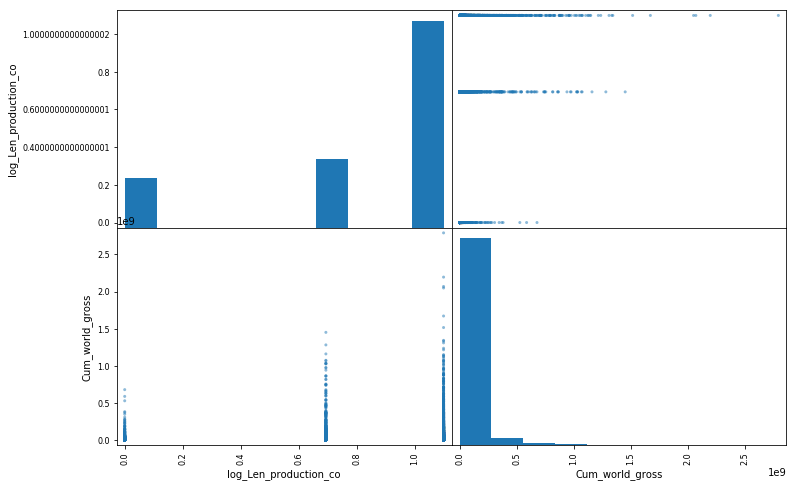

In [38]:
scatter_matrix(copy_train_set[["log_Len_production_co", "Cum_world_gross"]], figsize = (12,8))

In [37]:
copy_train_set['log_Len_production_co'] = np.log(copy_train_set["Len_production_co"])

In [34]:
copy_train_set['log_budget'] = np.log(copy_train_set["Budget"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015A66630>,
      dtype=object)

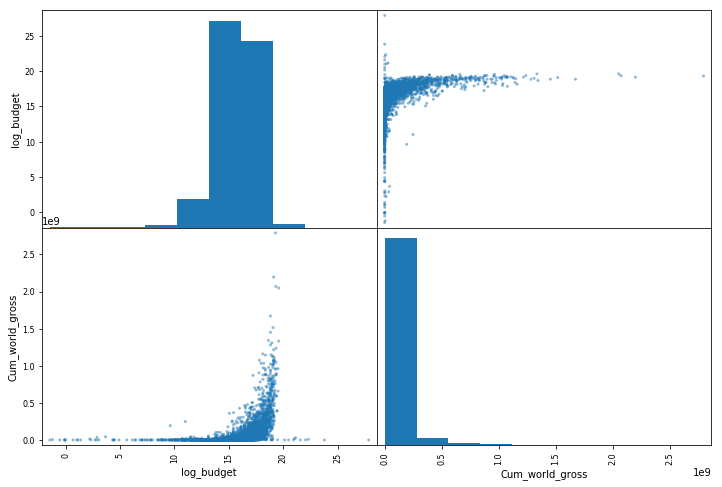

In [36]:
scatter_matrix(copy_train_set[["log_budget", "Cum_world_gross"]], figsize = (12,8))

## 5. Preparing data for Machine Learning

## 6. Preparing text and category variables

In [9]:
key_word = train_set['Key_word']
key_word_cat_encoded, key_word_categories = key_word.factorize()
encoder = OneHotEncoder()
key_word_1hot = (
    encoder.fit_transform(key_word_cat_encoded.reshape(-1,1))
)
kw = key_word_1hot.toarray()

C:\Users\1\Anaconda2\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [10]:
key_word_cat_encoded, key_word_categories = key_word.factorize()

In [11]:
key_word_cat_encoded

array([   0,    1,    2, ..., 3592, 1068, 1584], dtype=int64)

In [59]:
key_word_categories

Index([u' robin hood character', u' arctic ocean', u' opera',
       u' spider man action figure', u' shark', u' sequel',
       u' looking at oneself in a mirror', u' glowing eye', u' Documentary |',
       u' female nudity',
       ...
       u' shooting a woman', u' revolver', u' poaching', u' quarterback',
       u' tutor', u' simulated anal sex', u' yachting', u' year 1981',
       u' ash fall', u' german shepherd dog'],
      dtype='object', length=3620)

In [60]:
encoder = OneHotEncoder()

In [1]:
key_word_1hot = (
    encoder.fit_transform(key_word_cat_encoded.reshape(-1,1))
)

NameError: name 'encoder' is not defined

In [62]:
key_word_1hot

<7238x3620 sparse matrix of type '<type 'numpy.float64'>'
	with 7238 stored elements in Compressed Sparse Row format>

In [63]:
kw = key_word_1hot.toarray()

In [64]:
kw

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## 7. Construction features

In [16]:
attributes = (
    [
        "Len_genres",
        "Len_country",
        "Budget", 
        "Len_production_co", 
        "Run_time",
        "Age_rating",
        "Ex_year_writer",
        "Ex_year_director"
    ]
)

In [17]:
scaler = StandardScaler()

In [18]:
data = copy_train_set[attributes]

In [19]:
data

,Len_genres,Len_country,Budget,Len_production_co,Run_time,Age_rating,Ex_year_writer,Ex_year_director
0,3,1,6.000000e+07,3,108,13,2,3
1,1,1,1.078431e+06,3,84,16,0,0
2,2,1,2.500000e+06,2,104,18,0,0
3,5,2,2.000000e+07,3,116,18,0,14
4,1,1,2.000000e+06,1,92,16,0,0
5,1,1,6.250000e+05,1,85,17,0,0
6,2,1,1.559633e+06,3,113,15,0,0
7,5,2,2.293578e+07,3,107,13,20,20
8,6,1,1.250000e+08,1,92,6,8,17
9,3,1,6.500000e+04,3,100,13,0,0


In [20]:
scaler.fit(data)

C:\Users\1\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
features_scal = scaler.transform(data)

C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [22]:
df_features_scal = pd.DataFrame(features_scal, columns = attributes)

In [23]:
df_features_scal

,Len_genres,Len_country,Budget,Len_production_co,Run_time,Age_rating,Ex_year_writer,Ex_year_director
0,0.184029,-0.559869,-0.009571,0.685983,0.094351,-0.728745,-0.055890,-0.144373
1,-1.408321,-0.559869,-0.013604,0.685983,-1.163122,0.197066,-0.472072,-0.646039
2,-0.612146,-0.559869,-0.013507,-0.665445,-0.115228,0.814274,-0.472072,-0.646039
3,1.776379,0.426820,-0.012309,0.685983,0.513508,0.814274,-0.472072,1.695070
4,-1.408321,-0.559869,-0.013541,-2.016872,-0.743964,0.197066,-0.472072,-0.646039
5,-1.408321,-0.559869,-0.013636,-2.016872,-1.110727,0.505670,-0.472072,-0.646039
6,-0.612146,-0.559869,-0.013572,0.685983,0.356324,-0.111537,-0.472072,-0.646039
7,1.776379,0.426820,-0.012108,0.685983,0.041956,-0.728745,3.689752,2.698403
8,2.572554,-0.559869,-0.005121,-2.016872,-0.743964,-2.888970,1.192657,2.196737
9,0.184029,-0.559869,-0.013674,0.685983,-0.324807,-0.728745,-0.472072,-0.646039


## 8. Set y

In [12]:
copy_train_set.head()

,Unique_link,Name,Genres,Len_genres,Key_word,Director,Writer,Date_release,Country,Len_country,...,Age_rating,Metascore,Number_of_rewiews,Number_of_critics,Imdb_rating,Number_of_who_rated,Year,Oscar_wr,Ex_year_writer,Ex_year_director
0,/title/tt2023473/?ref_=kw_li_i,En enkel till Antibes,[u' Drama'],1,father child relationship,Richard Hobert,Richard Hobert,30 September 2011 (Sweden)\n,[u'Sweden'],1,...,16,47.0,4,4,6.0,539,2011,0,0,0
1,/title/tt0203755/?ref_=kw_li_i,One Night at McCool's (original title),"[u' Comedy', u' Crime']",2,pantyhose,Harald Zwart,Stan Seidel,27 April 2001 (USA)\n,[u'USA'],1,...,18,46.0,131,104,6.1,27928,2001,0,0,0
2,/title/tt0892255/?ref_=kw_li_i,Che: Part One (original title),"[u' Biography', u' Drama', u' History', u' War']",4,character name as title,Steven Soderbergh,Peter Buchman,5 September 2008 (Spain)\n,"[u'France', u'Spain', u'Mexico']",3,...,15,51.4,80,174,7.2,43121,2008,0,2,19
3,/title/tt0279231/?ref_=kw_li_i,Minoes (original title),"[u' Comedy', u' Family', u' Fantasy']",3,cat,Vincent Bal,Annie M.G. Schmidt,17 February 2005 (Russia)\n,[u'Netherlands'],1,...,13,50.0,16,16,6.8,4567,2001,0,0,0
4,/title/tt0119314/?ref_=kw_li_i,The Horse Whisperer (original title),"[u' Drama', u' Romance', u' Western']",3,horse,Robert Redford,Nick Evans,15 May 1998 (USA)\n,[u'USA'],1,...,13,65.0,280,98,6.6,37774,1998,0,0,6


In [24]:
for_y = (
    [
        "Number_of_who_rated",
        "Imdb_rating"
    ]
)

In [25]:
copy_train_set_y = copy_train_set[for_y]

In [26]:
copy_train_set_y.head()

,Number_of_who_rated,Imdb_rating
0,46749,6.1
1,3658,6.8
2,9727,6.5
3,110170,7.1
4,392,5.9


In [27]:
condition = (
    [
        (copy_train_set_y['Number_of_who_rated'] > 2000)
        & (copy_train_set_y['Imdb_rating'] > 7.5)
    ]
)

In [28]:
choice = [1]

In [29]:
copy_train_set_y['Y'] = np.select(condition, choice)

C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
copy_train_set_y

,Number_of_who_rated,Imdb_rating,Y
0,46749,6.1,0
1,3658,6.8,0
2,9727,6.5,0
3,110170,7.1,0
4,392,5.9,0
5,632,4.2,0
6,7502,7.4,0
7,19179,6.3,0
8,66778,6.5,0
9,98489,7.2,0


## 9. Training model

In [31]:
X = df_features_scal

In [32]:
y = copy_train_set_y["Y"]

In [33]:
log_reg = LogisticRegression()

In [34]:
log_reg.fit(X, y)

C:\Users\1\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## 10. Make prediction

In [35]:
test_set = pd.read_excel('C:/Users/1/Documents/Project/Sets/test_set.xlsx', index = False)

In [36]:
attributes = (
    [
        "Len_genres",
        "Len_country",
        "Budget", 
        "Len_production_co", 
        "Run_time",
        "Age_rating",
        "Ex_year_writer",
        "Ex_year_director"
    ]
)

In [37]:
sample_for_predict = test_set[attributes]

In [38]:
scaler.fit(sample_for_predict)

C:\Users\1\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
features_for_predict = scaler.transform(sample_for_predict)

C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [55]:
features_for_predict

array([[ 0.18402885, -0.55986931, -0.00957096, ..., -0.72874459,
        -0.05588964, -0.14437289],
       [-1.4083212 , -0.55986931, -0.01360446, ...,  0.19706632,
        -0.47207199, -0.64603923],
       [-0.61214617, -0.55986931, -0.01350715, ...,  0.81427358,
        -0.47207199, -0.64603923],
       ...,
       [-1.4083212 ,  0.42682026, -0.01313064, ...,  0.19706632,
        -0.47207199, -0.64603923],
       [ 2.57255392, -0.55986931, -0.01362695, ...,  0.81427358,
        -0.47207199, -0.64603923],
       [ 1.7763789 ,  1.41350984, -0.01265146, ...,  0.81427358,
        -0.05588964, -0.64603923]])

In [40]:
df_features_for_predict = pd.DataFrame(features_for_predict, columns = attributes)

In [41]:
df_features_for_predict.head()

,Len_genres,Len_country,Budget,Len_production_co,Run_time,Age_rating,Ex_year_writer,Ex_year_director
0,0.184029,-0.559869,-0.009571,0.685983,0.094351,-0.728745,-0.055890,-0.144373
1,-1.408321,-0.559869,-0.013604,0.685983,-1.163122,0.197066,-0.472072,-0.646039
2,-0.612146,-0.559869,-0.013507,-0.665445,-0.115228,0.814274,-0.472072,-0.646039
3,1.776379,0.426820,-0.012309,0.685983,0.513508,0.814274,-0.472072,1.695070
4,-1.408321,-0.559869,-0.013541,-2.016872,-0.743964,0.197066,-0.472072,-0.646039


In [42]:
test_set_y = test_set[for_y]

In [43]:
test_set_y

,Number_of_who_rated,Imdb_rating
0,46749,6.1
1,3658,6.8
2,9727,6.5
3,110170,7.1
4,392,5.9
5,632,4.2
6,7502,7.4
7,19179,6.3
8,66778,6.5
9,98489,7.2


In [44]:
condition = (
    [
        (test_set['Number_of_who_rated'] > 2000)
        & (test_set['Imdb_rating'] > 7.5)
    ]
)

In [45]:
test_set_y['Y'] = np.select(condition, choice)

C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
test_set_y.head()

,Number_of_who_rated,Imdb_rating,Y
0,46749,6.1,0
1,3658,6.8,0
2,9727,6.5,0
3,110170,7.1,0
4,392,5.9,0


In [47]:
predict_set = log_reg.predict(df_features_for_predict)

In [48]:
col = ["Y"]

In [53]:
predict_y = pd.DataFrame(predict_set)

In [54]:
predict_y

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


# 11. Except efficiency of model

In [ ]:
# проведем кроссвалидацию

In [65]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg, X, y, cv = 3, scoring = "accuracy")

array([0.92419221, 0.92164179, 0.92371476])

In [69]:
y_train_pred = cross_val_predict(log_reg, X, y, cv = 3)

In [ ]:
# построим матрицу неточностей

In [71]:
confusion_matrix(y, y_train_pred)

array([[6661,   21],
       [ 535,   21]], dtype=int64)

In [ ]:
# построим roc-кривую

In [77]:
fpr, tpr, thresholds = roc_curve(y, predict_y)

In [78]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

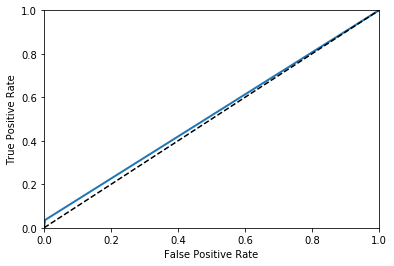

In [79]:
plot_roc_curve(fpr, tpr)
plt.show()

In [82]:
roc_auc_score(y ,predict_y)

0.5164142256981604

# Стохастический градиентный спуск

# Первый вариант

In [231]:
sgd_clf = SGDClassifier(random_state = 310)
sgd_clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=310, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [232]:
y_score = sgd_clf.predict(features_for_predict)

In [233]:
y_score

array([0, 0, 0, ..., 1, 0, 0])

In [234]:
fpr, tpr, thresholds = roc_curve(y, y_score)

In [235]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

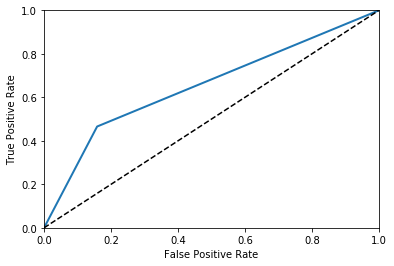

In [236]:
plot_roc_curve(fpr, tpr)
plt.show()

In [237]:
roc_auc_score(y ,y_score)

0.6536709273706446

# Второй вариант

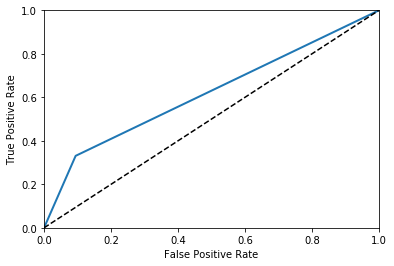

In [317]:
sgd_clf = SGDClassifier(random_state = 48)
sgd_clf.fit(X, y)
y_score = sgd_clf.predict(features_for_predict)
y_score
fpr, tpr, thresholds = roc_curve(y, y_score)
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [318]:
roc_auc_score(y ,y_score)

0.6183260515203521

# Третий вариант

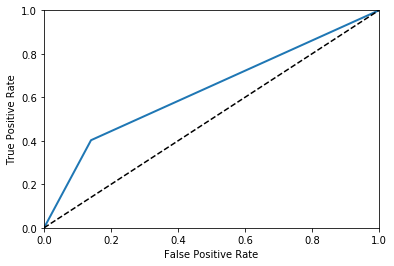

In [349]:
sgd_clf = SGDClassifier(random_state = 72)
sgd_clf.fit(X, y)
y_score = sgd_clf.predict(features_for_predict)
y_score
fpr, tpr, thresholds = roc_curve(y, y_score)
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [350]:
roc_auc_score(y ,y_score)

0.6313251105191872

# Четвертый вариант

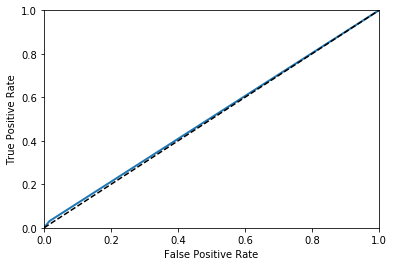

In [852]:
sgd_clf = SGDClassifier(random_state = 520)
sgd_clf.fit(X, y)
y_score = sgd_clf.predict(features_for_predict)
y_score
fpr, tpr, thresholds = roc_curve(y, y_score)
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [846]:
roc_auc_score(y ,y_score)

0.6019637746851306